# Task 4 Computer Vision

## 1.Image Loading

**Load an image from your local system using OpenCV.**

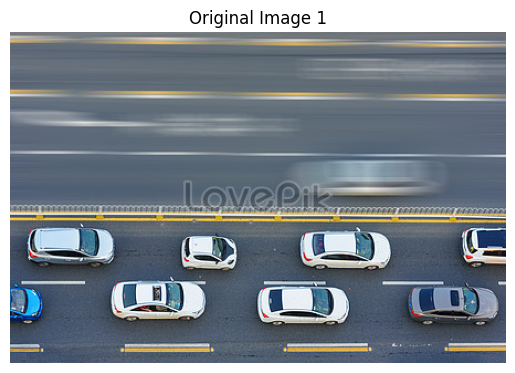

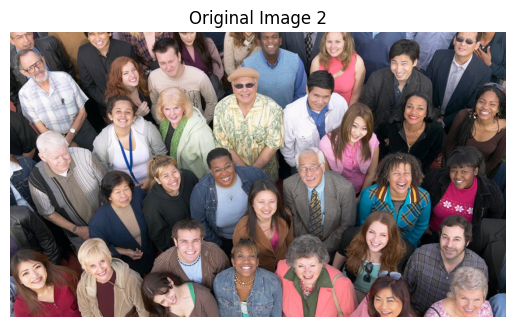

In [1]:
import cv2
import matplotlib.pyplot as plt

car_path = '/content/cars.jpg'
human_path = '/content/humans.jpg'

car = cv2.imread(car_path)
human = cv2.imread(human_path)

# Function to display images
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

display_image(car, "Original Image 1")
display_image(human, "Original Image 2")


**Color Space Conversion:**

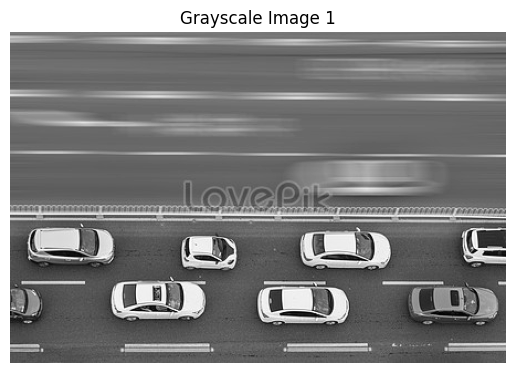

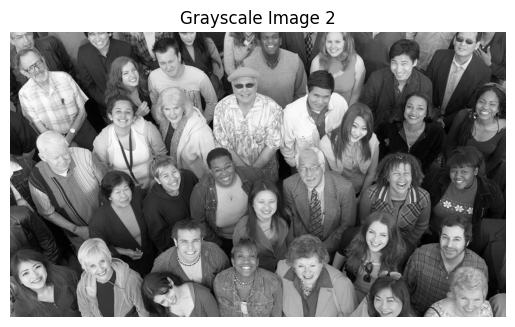

In [2]:
# Convert images to grayscale
image1_gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(human, cv2.COLOR_BGR2GRAY)

def display_gray_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

display_gray_image(image1_gray, "Grayscale Image 1")
display_gray_image(image2_gray, "Grayscale Image 2")



## 2.Convert the image to grayscale and display it.



**Convert the grayscale image to a different color space (e.g., HSV) and display it.**

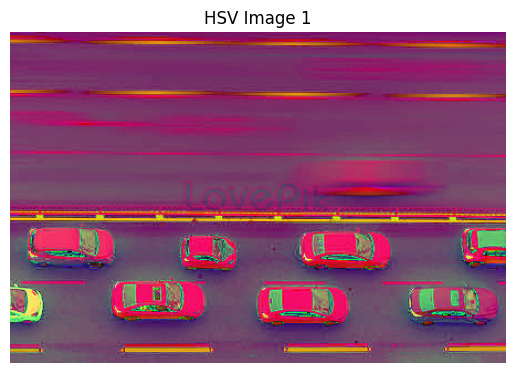

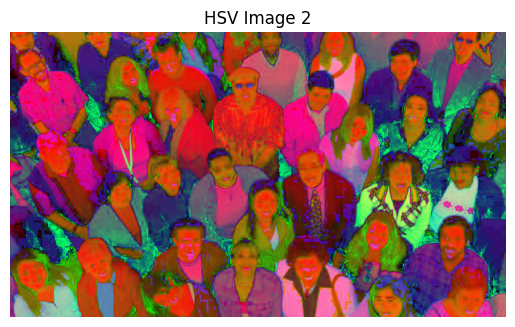

In [3]:
# Convert the original images to HSV color space
image1_hsv = cv2.cvtColor(car, cv2.COLOR_BGR2HSV)
image2_hsv = cv2.cvtColor(human, cv2.COLOR_BGR2HSV)

display_image(image1_hsv, "HSV Image 1")
display_image(image2_hsv, "HSV Image 2")


## 3.Image Filtering:

**Apply Gaussian Blur to the original color image and display the result.**

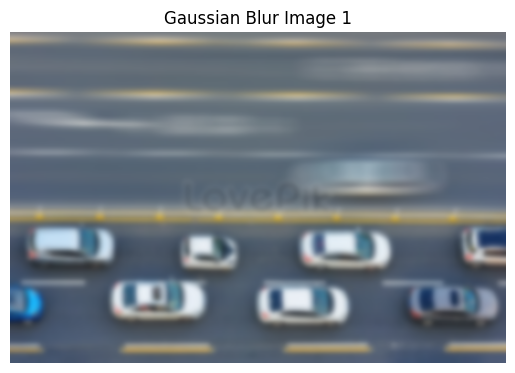

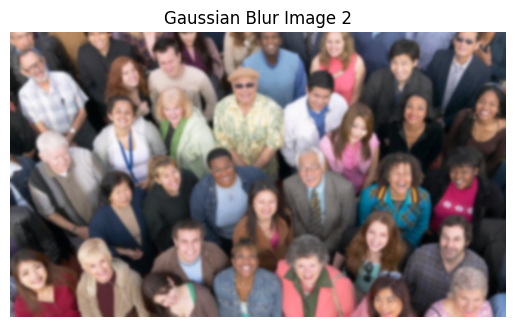

In [4]:
# Apply Gaussian Blur to the original color images
image1_blur = cv2.GaussianBlur(car, (15, 15), 0)
image2_blur = cv2.GaussianBlur(human, (15, 15), 0)

display_image(image1_blur, "Gaussian Blur Image 1")
display_image(image2_blur, "Gaussian Blur Image 2")

**Apply a custom kernel for image smoothing (e.g., averaging) and display the result.**

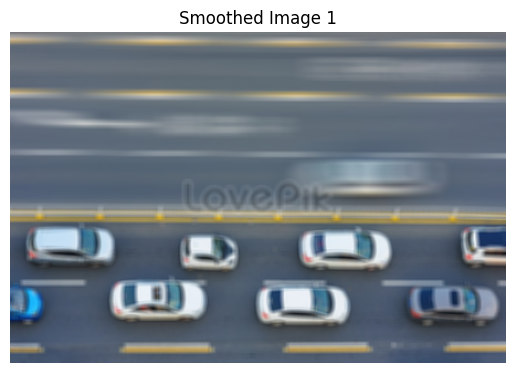

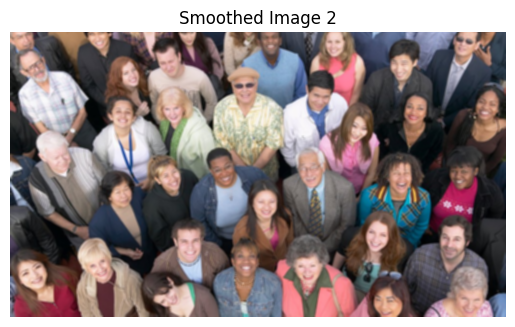

In [5]:
import numpy as np

# Defining custom kernel for averaging
kernel = np.ones((5, 5), np.float32) / 25

# Applying custom kernel for image smoothing
image1_smoothed = cv2.filter2D(car, -1, kernel)
image2_smoothed = cv2.filter2D(human, -1, kernel)

display_image(image1_smoothed, "Smoothed Image 1")
display_image(image2_smoothed, "Smoothed Image 2")

## 4.Edge Detection:

**Apply Canny edge detection to the grayscale image and display the edges.**

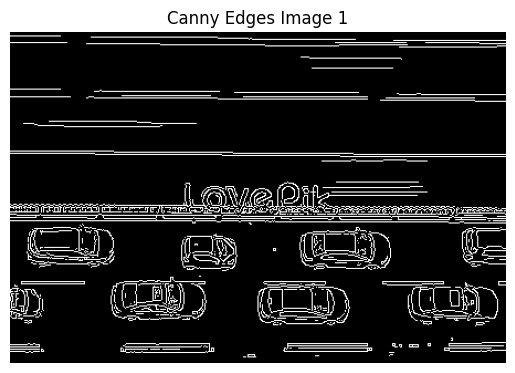

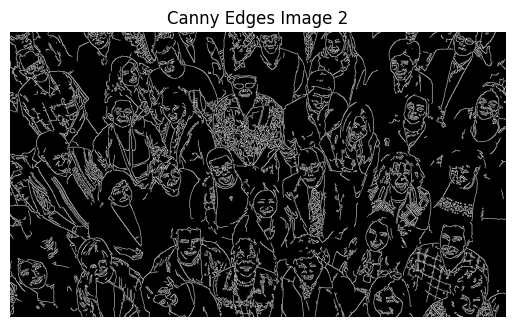

In [6]:
def display_image(image, title="Image", cmap=None):
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Convert images to grayscale
image1_gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(human, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges1 = cv2.Canny(image1_gray, 100, 200)
edges2 = cv2.Canny(image2_gray, 100, 200)

display_image(edges1, "Canny Edges Image 1", cmap='gray')
display_image(edges2, "Canny Edges Image 2", cmap='gray')

## 5.Contours:

**Find and draw contours on the original image based on the edges obtained from Canny.**

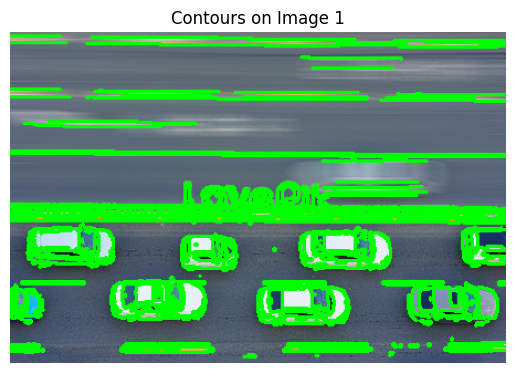

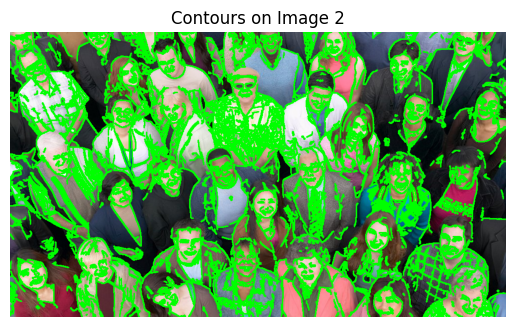

In [7]:
image1_gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(human, cv2.COLOR_BGR2GRAY)

edges1 = cv2.Canny(image1_gray, 100, 200)
edges2 = cv2.Canny(image2_gray, 100, 200)

# Find contours
contours1, _ = cv2.findContours(edges1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(edges2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original images
image1_contours = car.copy()
image2_contours = human.copy()

cv2.drawContours(image1_contours, contours1, -1, (0, 255, 0), 2)
cv2.drawContours(image2_contours, contours2, -1, (0, 255, 0), 2)

display_image(image1_contours, "Contours on Image 1")
display_image(image2_contours, "Contours on Image 2")


## 6.Histogram:

**Compute and display the histogram of the grayscale image.**

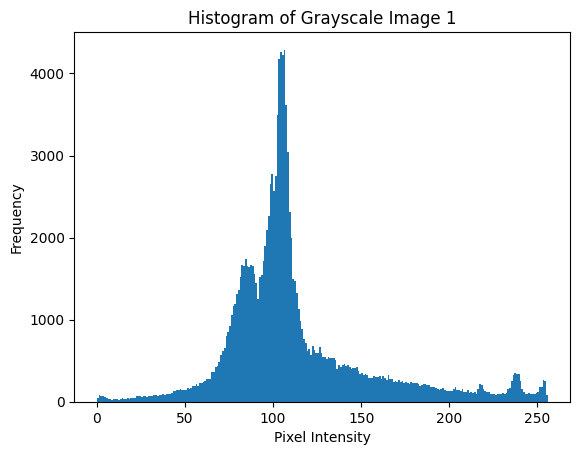

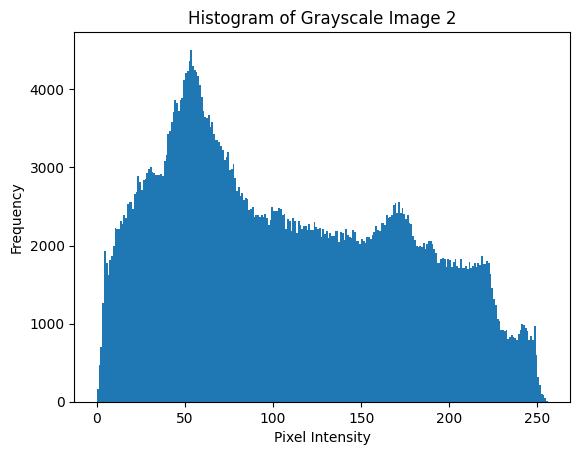

In [8]:

image1_gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(human, cv2.COLOR_BGR2GRAY)

# Function to plot histogram
def plot_histogram(image, title):
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(image1_gray, "Histogram of Grayscale Image 1")
plot_histogram(image2_gray, "Histogram of Grayscale Image 2")

## 7.Object Detection:

**Load a pre-trained object detection model and apply it to detect cars in the image. (In case of humans detect faces else detect the object present in the image)**

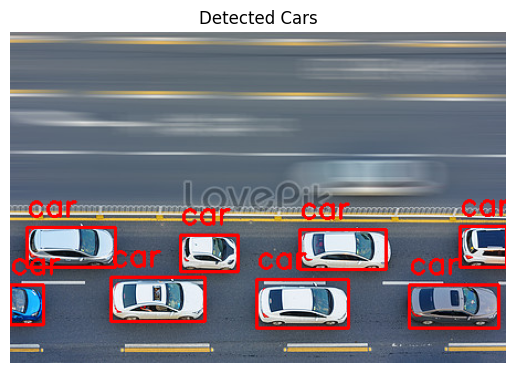

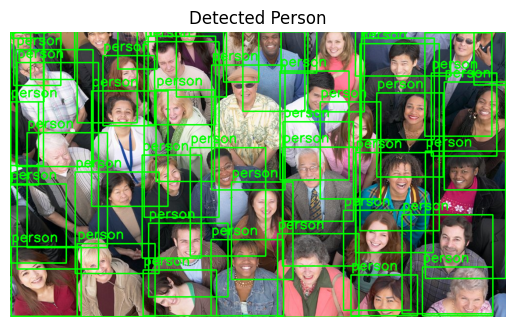

In [10]:
import numpy as np
import torch
from torchvision import models, transforms


# Load the pre-trained object detection model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the image transformation
transform = transforms.Compose([
    transforms.ToTensor()
])

# COCO classes
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
    'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Function to perform object detection
def detect_objects(image_cv, detection_type):

    image_tensor = transform(image_cv).unsqueeze(0)
    with torch.no_grad():
        predictions = model(image_tensor)


    threshold = 0.3

    # Draw bounding boxes
    for i, box in enumerate(predictions[0]['boxes']):
        score = predictions[0]['scores'][i].item()
        if score > threshold:
            box = box.numpy().astype(np.int32)
            label = COCO_INSTANCE_CATEGORY_NAMES[predictions[0]['labels'][i]]
            if detection_type == 'cars' and label == 'car':
                color = (255, 0, 0)
                cv2.rectangle(image_cv, (box[0], box[1]), (box[2], box[3]), color, 2)
                cv2.putText(image_cv, label, (box[0], box[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
            elif detection_type == 'faces' and label == 'person':
                color = (0, 255, 0)
                cv2.rectangle(image_cv, (box[0], box[1]), (box[2], box[3]), color, 2)
                cv2.putText(image_cv, label, (box[0], box[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    return image_cv


# Convert images to RGB
car_rgb = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
human_rgb = cv2.cvtColor(human, cv2.COLOR_BGR2RGB)


detected_cars = detect_objects(car_rgb, 'cars')
cv2.imwrite('/content/detected_cars.jpg', cv2.cvtColor(detected_cars, cv2.COLOR_RGB2BGR))
plt.imshow(detected_cars)
plt.axis('off')
plt.title('Detected Cars')
plt.show()

detected_faces = detect_objects(human_rgb, 'faces')
cv2.imwrite('/content/detected_faces.jpg', cv2.cvtColor(detected_faces, cv2.COLOR_RGB2BGR))
plt.imshow(detected_faces)
plt.axis('off')
plt.title('Detected Person')
plt.show()
